In [22]:
from control import tf, step
from numpy import linspace

In [205]:
Δt = 0.001
t0, tf = 0, 20
t = linspace(t0, tf, (tf - t0)/Δt)

In [206]:
kp = 0.5
kd = 2
ki = 1
b, a = 50, 0.36

Modelo de servomotor
====================

$$
G(s) = \left(\frac{b}{s+a}\right) \left(\frac{1}{s}\right)
$$

Modelo de controladores proporcional, derivativo e integral
===========================================================

$$
C_p(s) = K_p
$$

$$
C_D(s) = K_D s
$$

$$
C_I(s) = \frac{K_I}{s}
$$

Modelo de filtro de suavizado
=============================

$$
F(s) = \frac{20}{s + 20}
$$

In [197]:
G1 = tf([b], [1, a])
G2 = tf([1], [1, 0])

Cp = tf([kp], [1])
Cd = tf([kd, 0], [1])
Ci = tf([ki], [1, 0])

Filtro = tf([20], [1, 20])

In [151]:
G = G1*G2

Una simulación rapida con el modulo de control para recordar lo básico

In [217]:
y0, t0 = step(G, t)
y1, t1 = step(G.feedback(Cp), t)

In [218]:
%matplotlib notebook
from matplotlib.pyplot import figure, style

In [219]:
style.available

['dark_background',
 'bmh',
 'fivethirtyeight',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-notebook',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'ggplot',
 'grayscale']

In [220]:
style.use('ggplot')

<IPython.core.display.Javascript object>


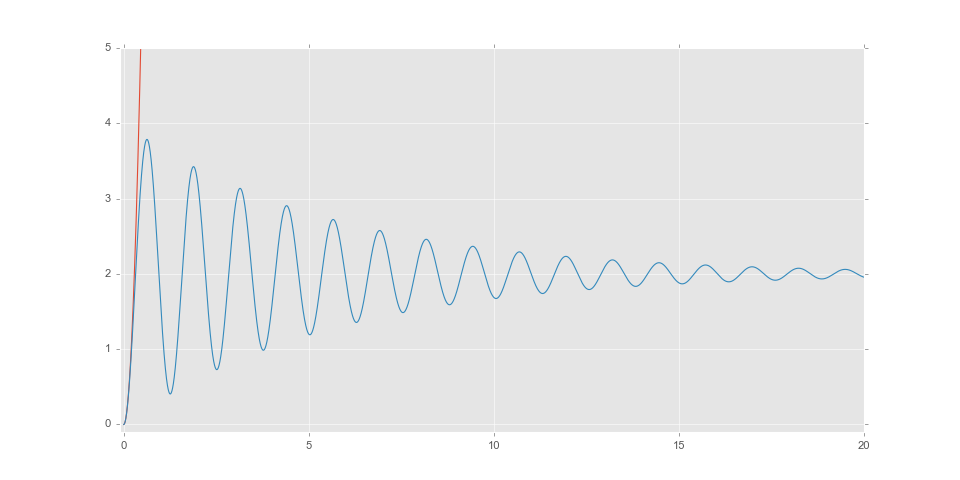

In [224]:
fig = figure(figsize=(12,6))
ax = fig.gca()

ax.plot(t0,y0)
ax.plot(t1, y1)
ax.set_ylim(-0.1, 5)
ax.set_xlim(-0.1, 20);

Si ahora intentamos usar ```odeint()``` de **scipy**

In [98]:
from scipy.integrate import odeint

In [99]:
odeint?

OK, ni pidiendo ayuda... me pregunto si ya habra la función en control...

In [105]:
import control
control.initial?

In [152]:
y2, t2 = control.initial(G, t, 1)

<IPython.core.display.Javascript object>


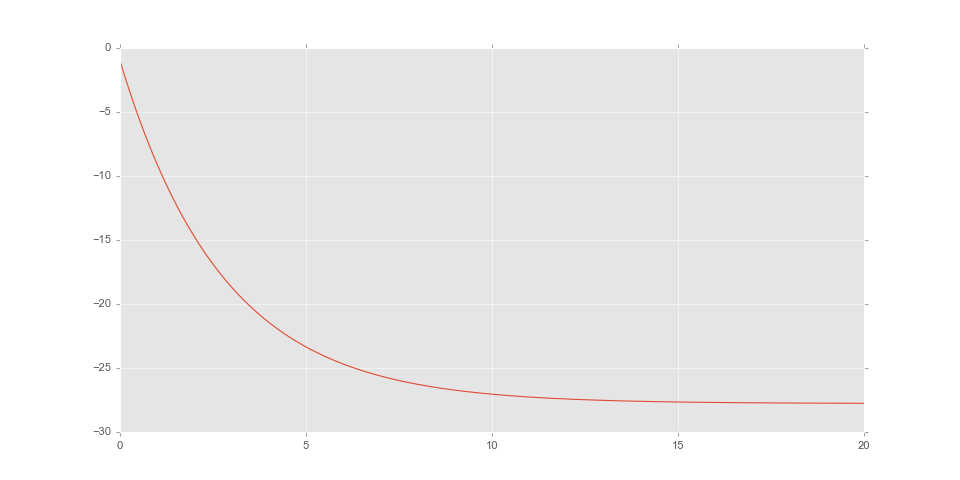

In [153]:
fig = figure(figsize=(12,6))
ax = fig.gca()

#ax.plot(t0,y0)
ax.plot(t3, y3)
#ax.set_ylim(-0.1, 2)
#ax.set_xlim(-0.1, 20);

No, esto no es lo que busco... que tal esto:

In [124]:
control.forced_response?

Ahhh, esto si! vamos a meter una señal senoidal al sistema

In [154]:
from numpy import sin

In [225]:
# Definimos una señal senoidal con un periodo de oscilacion de 0.5 Hz
ω = 0.5
señal_senoidal = sin(ω*t)

# Y la filtramos para evitar cualquier comportamiento extraño
# Esto no es tan util en este momento, tan solo es una prueba para ejemplos posteriores
ts, señal_senoidal_filtrada, xs = control.forced_response(Filtro, t, señal_senoidal, 0)

In [227]:
tp, yp, xp = control.forced_response(G, t, señal_senoidal_filtrada, 0)

<IPython.core.display.Javascript object>


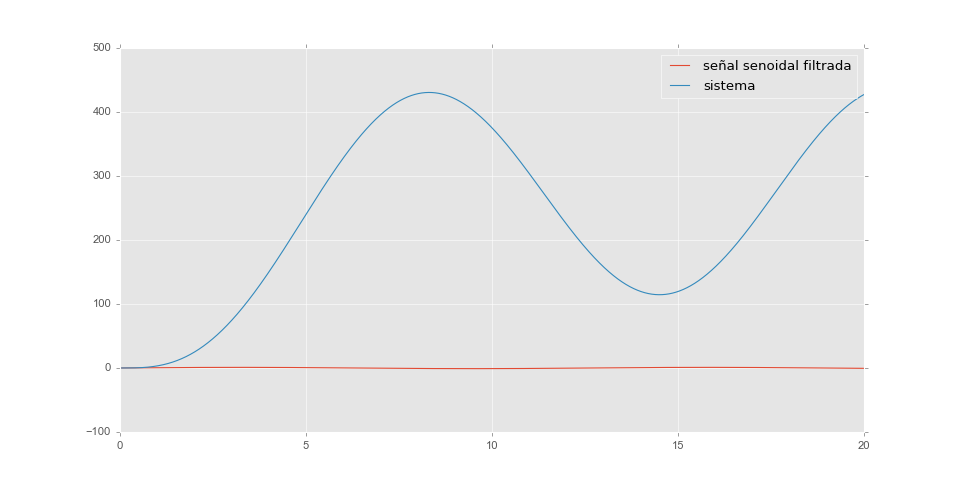

In [235]:
fig = figure(figsize=(12,6))
ax = fig.gca()

p1, = ax.plot(ts, señal_senoidal_filtrada)
p2, = ax.plot(tp, yp)
#ax.set_ylim(-1.1, 20.1)
#ax.set_xlim(-0.1, 20.1)

ax.legend([p1, p2], ['señal senoidal filtrada', 'sistema']);

Si, esto se ve prometedor... vamos a intentar con un escalon unitario y los sistemas con controles P y PI basicos

In [238]:
tolerancia = 0.001
escalon = lambda ts: [1 if t>tolerancia else 0 for t in ts]
señal_escalon = escalon(t)

ts, señal_escalon_filtrada, xs = control.forced_response(Filtro, t, señal_escalon, 0)

In [239]:
servo_control_proporcional = (Cp*G).feedback()
servo_control_proporcional_derivativo = ((Cp + Cd)*G).feedback()
servo_control_proporcional, servo_control_proporcional_derivativo

(
         25
 -----------------
 s^2 + 0.36 s + 25, 
     100 s + 25
 ------------------
 s^2 + 100.4 s + 25)

In [240]:
t4, y4, x4 = control.forced_response(servo_control_proporcional, t, señal_escalon_filtrada, 0)
t5, y5, x5 = control.forced_response(servo_control_proporcional_derivativo, t, señal_escalon_filtrada, 0)

<IPython.core.display.Javascript object>


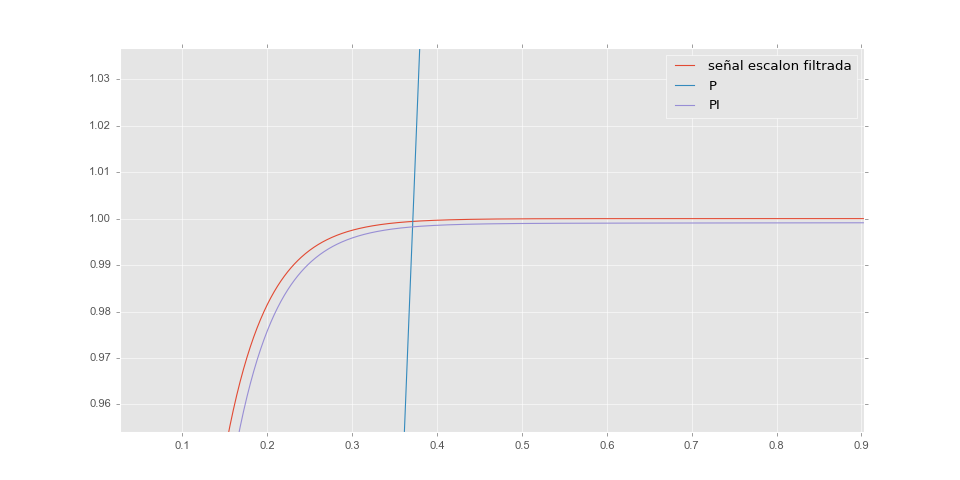

In [244]:
fig = figure(figsize=(12,6))
ax = fig.gca()

p0, = ax.plot(ts, señal_escalon_filtrada)
#p1, = ax.plot(ts, señal_senoidal_filtrada)
p2, = ax.plot(t4,y4)
p3, = ax.plot(t4, y5)
#ax.set_ylim(-0.1, 2)
#ax.set_xlim(-0.1, 20);

ax.legend([p0, p2, p3], ['señal escalon filtrada', 'P', 'PI']);

Ahhhh! Que belleza!